In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/website_wata.csv")

In [3]:
df = data.copy()

In [4]:
df.shape

(2000, 7)

In [5]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


# handling missing values

In [6]:
df.isnull().sum()

,0
Page Views,0
Session Duration,0
Bounce Rate,0
Traffic Source,0
Time on Page,0
Previous Visits,0
Conversion Rate,0


# balancing the dataset

In [10]:
(df["Conversion Rate"].value_counts()/2000)*100

,count
Conversion Rate,
1.000000,88.65
0.810644,0.05
0.776896,0.05
0.939657,0.05
0.691846,0.05
...,...
0.833570,0.05
0.919122,0.05
0.562878,0.05


In [11]:
df["Conversion Rate"] = np.where(df["Conversion Rate"] < 1,0,df["Conversion Rate"])

In [12]:
df["Conversion Rate"].unique()

array([1., 0.])

In [13]:
(df["Conversion Rate"].value_counts()/2000)*100

,count
Conversion Rate,
1.0,88.65
0.0,11.35


as clearly seen the dataset is imbalance so we need to balance it by using any one of the following


*   oversampling
*   undersampling
*   SMOTE



# outliers handling

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

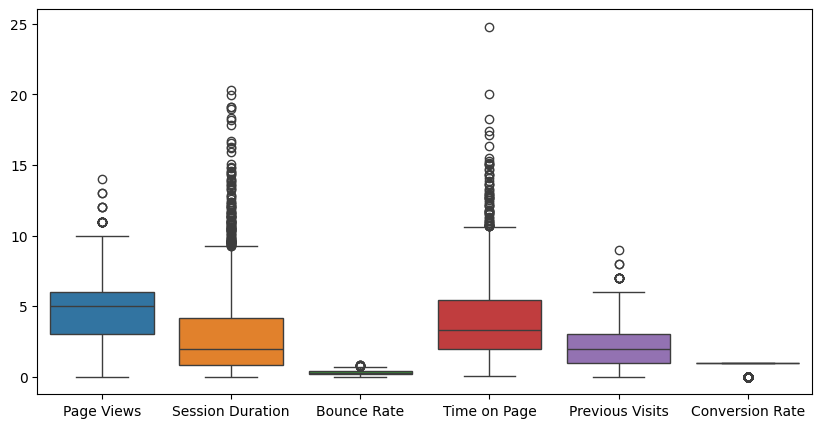

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

In [28]:
for feature in df[['Page Views', 'Session Duration', 'Bounce Rate',
       'Time on Page', 'Previous Visits']]:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper = df[feature].quantile(0.75) + 1.5*IQR
    lower = df[feature].quantile(0.25) - 1.5*IQR
    df[feature] = np.where(df[feature] > upper, upper,
                           np.where(df[feature] < lower, lower, df[feature]))


<Axes: >

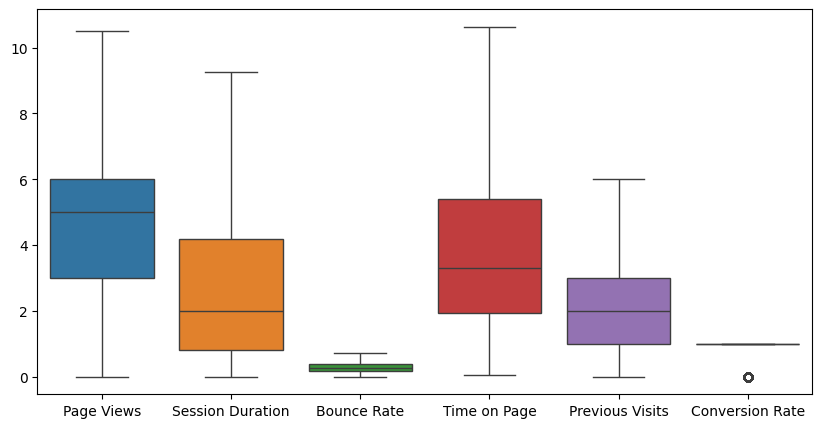

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

# feature encoding

In [30]:
df["Traffic Source"].unique()

array(['Organic', 'Social', 'Paid', 'Direct', 'Referral'], dtype=object)

**ordinal number encoding**

In [31]:
encode = {'Organic':0, 'Social':1, 'Paid':2, 'Direct':3, 'Referral':4}
df["Traffic Source"] = df["Traffic Source"].map(encode)

In [33]:
df["Traffic Source"].unique()

array([0, 1, 2, 3, 4])

In [34]:
df.to_csv("website_data_cleaned.csv",index=False)